In [1]:
%cd ..

c:\Users\ybtwe\OneDrive - University of Illinois - Urbana\Documents\YbII


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fitting Module
import lmfit
from lmfit.models import gaussian2d

# Image Processing Module
import imageio
import matplotlib.pyplot as plt

import scipy.ndimage

from src.functions.math import func as mathf
from src.functions.optics import func as optf
from src.constants import const

In [88]:
def getSeparation(img1, img2):
    #input: image data as a 2D Matrix
    #output: image data,x-center point,y-center point, x-waist, y-waist, fit
    #Note: all position outputs are in pixel

    # if img_bg == None:
    #     img_res = np.abs(np.array(img, dtype=float))
    # else:
    #     img_res = np.abs(np.array(img, dtype=float) - np.array(img_bg, dtype=float))
    
    # max_x1 = np.argmax(img1, axis=0)
    # max_y1 = np.argmax(img1, axis=1)

    # max_x2 = np.argmax(img2, axis=0)
    # max_y2 = np.argmax(img2, axis=1)

    max_x1,max_y1 = np.unravel_index(np.argmax(img1, axis=None), img1.shape)
    max_x2,max_y2 = np.unravel_index(np.argmax(img2, axis=None), img2.shape)

    # print(img1)

    # print(max_x1,max_x2)
    
    separation = lambda x1,y1,x2,y2 : ((x1-x2)**2+(y1-y2)**2)**(1/2)

   

    return (max_x1,max_y1), (max_x2,max_y2), separation(max_x1,max_y1,max_x2,max_y2)

def plotFittedImage(img1,img2,m=None,file_name = None, pixel=None):
    #input is .bmp image

    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    fig.set_facecolor('w')

    #Rotate the image at some angle
    # angle = 15
    # img1 = scipy.ndimage.rotate(img1,angle)
    # img2 = scipy.ndimage.rotate(img2,angle)
    # if img_bg:
    #     img_bg = scipy.ndimage.rotate(img_bg,angle)

    img_res = np.abs(np.array(img1, dtype=float) + np.array(img2, dtype=float))    


    x_rg = np.arange(0, img1.shape[1])
    y_rg = np.arange(0, img1.shape[0])

    coord1, coord2, separation = getSeparation(img1, img2)
    max_x1,max_y1 = coord1
    max_x2,max_y2 = coord2

    axs[0].imshow(img_res, cmap='gray', vmin=0, vmax=255)

    axs[0].set_xlim([0, img_res.shape[1]])
    axs[0].set_ylim([0, img_res.shape[0]])
    axs[0].set_xlabel('Pixel')
    axs[0].set_ylabel('Pixel')
    axs[0].plot([max_y1, max_y2],[max_x1, max_x2], '-ro')



    axs[1].imshow(img1, cmap='gray', vmin=0, vmax=255)

    axs[1].set_xlim([0, img1.shape[1]])
    axs[1].set_ylim([0, img1.shape[0]])
    axs[1].set_xlabel('Pixel')
    axs[1].set_ylabel('Pixel')
    axs[1].plot(max_y1, max_x1, '-ro')

    # axs[0].hlines(y0-wy, x0-wx, x0+wx, color='b', linestyles='dashed')
    # axs[0].hlines(y0+wy, x0-wx, x0+wx, color='b', linestyles='dashed')
    # axs[0].vlines(x0-wx, y0-wy, y0+wy, color='r', linestyles='dashed')
    # axs[0].vlines(x0+wx, y0-wy, y0+wy, color='r', linestyles='dashed')

    axs[2].imshow(img2, cmap='gray', vmin=0, vmax=255)

    axs[2].set_xlim([0, img2.shape[1]])
    axs[2].set_ylim([0, img2.shape[0]])
    axs[2].set_xlabel('Pixel')
    axs[2].set_ylabel('Pixel')
    axs[2].plot(max_y2, max_x2, '-ro')

    # axs[1].scatter(x_rg, x_data)
    # axs[1].plot(x_rg, x_fit, 'r', label='x Fit')
    # axs[1].scatter(y_rg, y_data)
    # axs[1].plot(y_rg, y_fit, 'b', label='y Fit')
    # axs[1].vlines(x0-wx, 0, 100, color='r', linestyles='dashed', label='x bounds')
    # axs[1].vlines(x0+wx, 0, 100, color='r', linestyles='dashed')
    # axs[1].vlines(y0-wy, 0, 100, color='b', linestyles='dashed', label='y bounds')
    # axs[1].vlines(y0+wy, 0, 100, color='b', linestyles='dashed')
    
    if file_name:
        axs[1].set_title(file_name[0])
        axs[2].set_title(file_name[1])



    #pixel_size in mm
    pixel_size = 1.67e-3 
    separation_mm = pixel_size*separation
    print(max_y2, max_x2)
    print(max_y1, max_x1)
    print(max_x1-max_x2,max_y1-max_y2)
    print((max_x1-max_x2)**2,(max_y1-max_y2)**2)
    print((max_x1-max_x2)**2+(max_y1-max_y2)**2)
    print(((max_x1-max_x2)**2+(max_y1-max_y2)**2)**(1/2))


    if m:
        separation_mm = separation_mm/m

    if pixel:
        fig.suptitle(f'separation = {separation:.2f} pixel')
    else:
        fig.suptitle(f'separation = {separation_mm:.2f} mm')


C:\Users\ybtwe\AppData\Local\Temp/ipykernel_8680/2602155229.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread(file_path+file_name1+".bmp")
C:\Users\ybtwe\AppData\Local\Temp/ipykernel_8680/2602155229.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread(file_path+file_name2+".bmp")


1795 1448
1887 1196
-252 92
63504 8464
71968
268.26852219371546


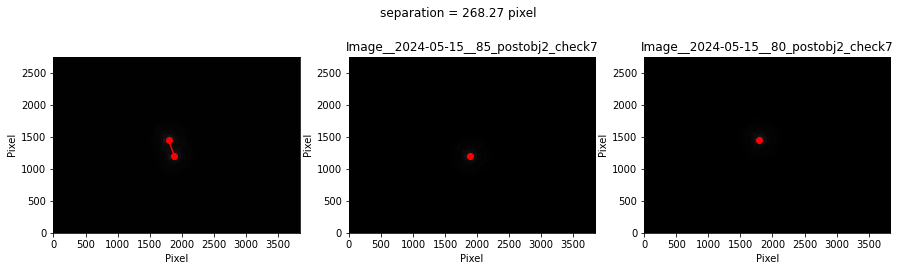

In [89]:
file_path = "C:/Users/ybtwe/OneDrive - University of Illinois - Urbana/Desktop/Tweezer/Post_objective/"
file_name1 = "Image__2024-05-15__85_postobj2_check7"
file_name2 = "Image__2024-05-15__80_postobj2_check7"

img1 = imageio.imread(file_path+file_name1+".bmp")
img2 = imageio.imread(file_path+file_name2+".bmp")

plotFittedImage(img1,img2, file_name=[file_name1,file_name2], pixel=True)

C:\Users\ybtwe\AppData\Local\Temp/ipykernel_8680/4081772860.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread(file_path+file_name1+".bmp")
C:\Users\ybtwe\AppData\Local\Temp/ipykernel_8680/4081772860.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread(file_path+file_name2+".bmp")


1772 1707
2468 2135
428 696
183184 484416
667600
817.0679286326199


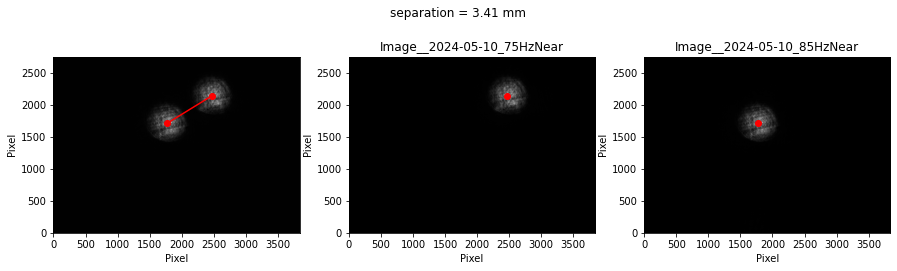

In [95]:
file_path = "C:/Users/ybtwe/OneDrive - University of Illinois - Urbana/Desktop/Tweezer/test_tweezer/"
file_name1 = "Image__2024-05-10_75HzNear"
file_name2 = "Image__2024-05-10_85HzNear"

img1 = imageio.imread(file_path+file_name1+".bmp")
img2 = imageio.imread(file_path+file_name2+".bmp")

plotFittedImage(img1,img2,m = 0.4,file_name=[file_name1,file_name2])